In [51]:
import pandas as pd

def isNaN(x):
    return x != x

data1 = pd.read_csv("IDCJAC0001_070014_Data1.csv")
data1.to_csv("old_rain.csv")
data2 = pd.read_csv("IDCJAC0002_070014_Data1.csv")
data2.to_csv("old_temp.csv")
data3 = pd.read_csv("IDCJAC0001_070351_Data1.csv")
data3.to_csv("new_rain.csv")
data4 = pd.read_csv("IDCJAC0002_070351_Data1.csv")
data4.to_csv("new_temp.csv")

climate_data = pd.DataFrame(columns={"rainfall", "max_temp"})

for i, row in data1.iterrows():
    date = f"{row.Year}-{str(row.Month).zfill(2)}"
    date = pd.to_datetime(date, format="%Y-%m")
    climate_data.loc[date, "rainfall"] = row["Monthly Precipitation Total (millimetres)"]

for i, row in data2.iterrows():
    date = f"{row.Year}-{str(row.Month).zfill(2)}"
    date = pd.to_datetime(date, format="%Y-%m")
    climate_data.loc[date, "max_temp"] = row["Mean maximum temperature (°C)"]

for i, row in data3.iterrows():
    date = f"{row.Year}-{str(row.Month).zfill(2)}"
    date = pd.to_datetime(date, format="%Y-%m")
    climate_data.loc[date, "rainfall"] = row["Monthly Precipitation Total (millimetres)"]

for i, row in data4.iterrows():
    date = f"{row.Year}-{str(row.Month).zfill(2)}"
    date = pd.to_datetime(date, format="%Y-%m")
    climate_data.loc[date, "max_temp"] = row["Mean maximum temperature (°C)"]

for i, month in enumerate(climate_data.index):
    base = 0
    if i - 59 > 0:
        base = i - 59
    climate_data.loc[month, "mean_temp"] = climate_data.iloc[base:i + 1, 0].mean()
    climate_data.loc[month, "mean_rainfall"] = climate_data.iloc[base:i + 1, 1].mean()
    
new_data = climate_data[climate_data.index > pd.to_datetime("1970-12", format="%Y-%m")]
new_data.to_csv("climate_data.csv", index_label="date")

In [52]:
soi_data = pd.read_csv("soi_monthly.txt", header=None, names=["month", "soi"])
soi_data["month"] = pd.to_datetime(soi_data["month"], format="%Y%m")

soi_mean = []
for i in soi_data.index:
    soi_mean.append(round(soi_data.loc[i - 5:i].soi.mean(), 1))

soi_data["mean"] = soi_mean

soi_data[soi_data["month"] > pd.to_datetime("1970-12", format="%Y-%m")].to_csv("soi_data.csv", index=False)

KeyError: "None of [DatetimeIndex(['1971-01-01', '1971-02-01', '1971-03-01', '1971-04-01',\n               '1971-05-01', '1971-06-01', '1971-07-01', '1971-08-01',\n               '1971-09-01', '1971-10-01',\n               ...\n               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',\n               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',\n               '2020-11-01', '2020-12-01'],\n              dtype='datetime64[ns]', length=600, freq=None)] are in the [columns]"

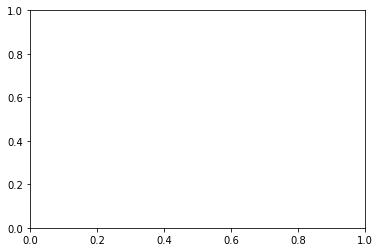

In [68]:
y = new_data["rainfall"]
x = new_data.index
new_data.plot(kind="scatter", y="rainfall", x=new_data.index)